# Single Neuron Linear Regression & Gradient Descent

Linear regression is used to predict the value of a variable based on another variable. We do this by using gradient descent. Gradient descent is an optimization algorithm for finding a local minimum of a differentiable function.

# Application

In this module, we will implement linear regression on the Gentoo Penguins portion of the Palmer Penguins dataset. Provided here is the SingleNeuron class that implements all of the math into code. For the sake of simplicity and also experimenting(!), we will use the skikitlearn import of LinearRegression instead!

```python

class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 
    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


We begin our regression journey here!

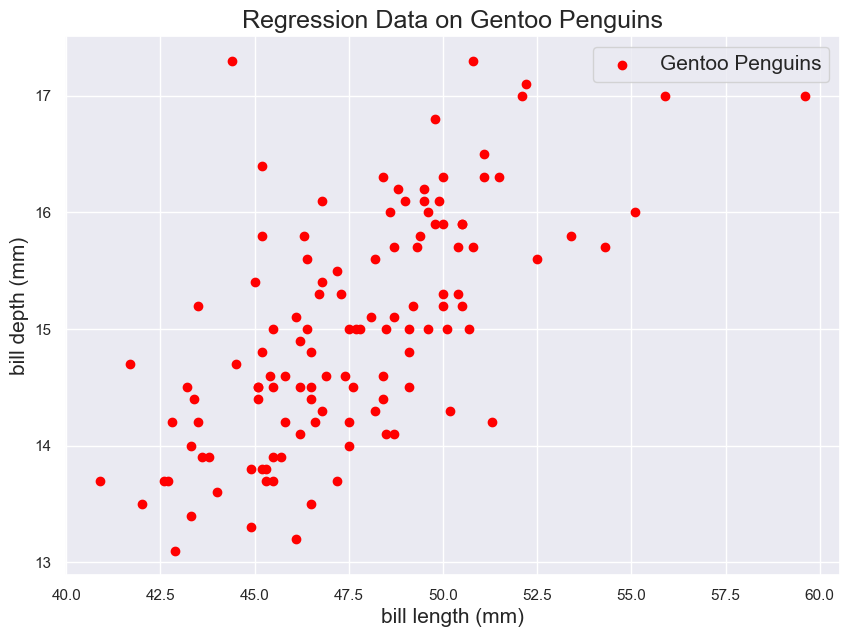

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
sns.set_theme()

df = pd.read_csv(r"C:\Users\faith\inde 577\577repo\Supervised Learning\Datasets\palmer_penguins.csv")
df = df.iloc[220:]
df = df.dropna()

plt.figure(figsize = (10, 7))
plt.scatter(df.bill_length_mm, 
            df.bill_depth_mm, 
            color = "red",
            label = "Gentoo Penguins")
plt.xlabel("bill length (mm)", fontsize = 15)
plt.ylabel("bill depth (mm)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Regression Data on Gentoo Penguins", fontsize = 18)
plt.show()


We are now going to convert the data into a numpy.ndarray

In [2]:
X = df['bill_length_mm'].values.reshape(-1, 1) #specfiically reshapes to -1 and 1
y = df['bill_depth_mm'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

NameError: name 'SingleNeuron' is not defined

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



NameError: name 'node' is not defined

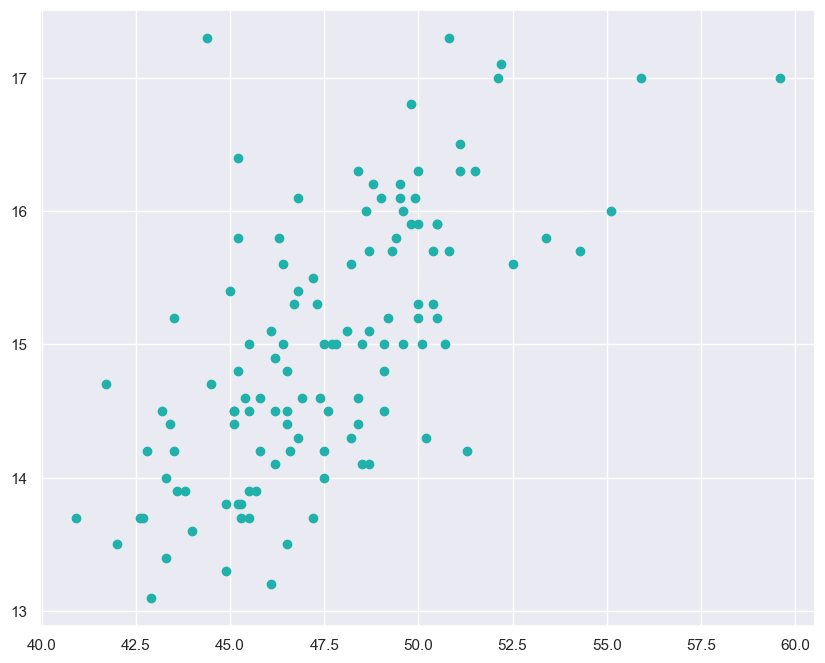

In [5]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "gentoo penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill width [mm]", fontsize = 15)
plt.title("Gentoo Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

---

The line generated by our custom ```SingleNeuron``` class surely does not look random! We can verify this by plotting the ```errors_``` attribute that we stored while training. Note that the $i$-th entry of the ```errors_``` attribute is the *mean-sqaured error* of the neuron after the $i+1$ epoch of stochastic gradient descent. If the mean sqaured error is decreasing after each epoch we are on the right track, and our single neuron might be learning! 

We can visualize the mean-sqaured error at each epoch of our training process by running the following code in the cell below. 
```python
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

```

---

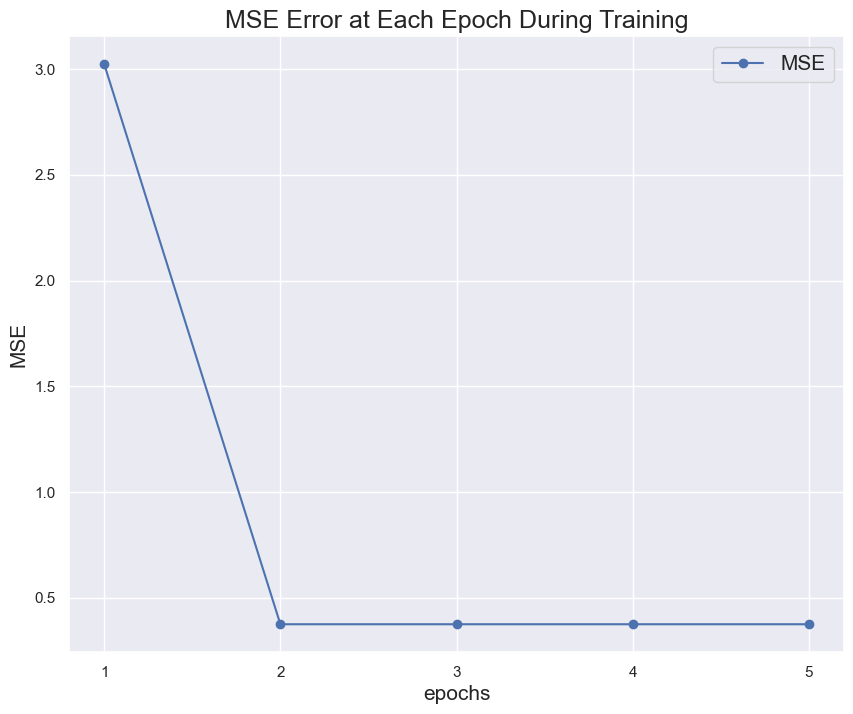

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

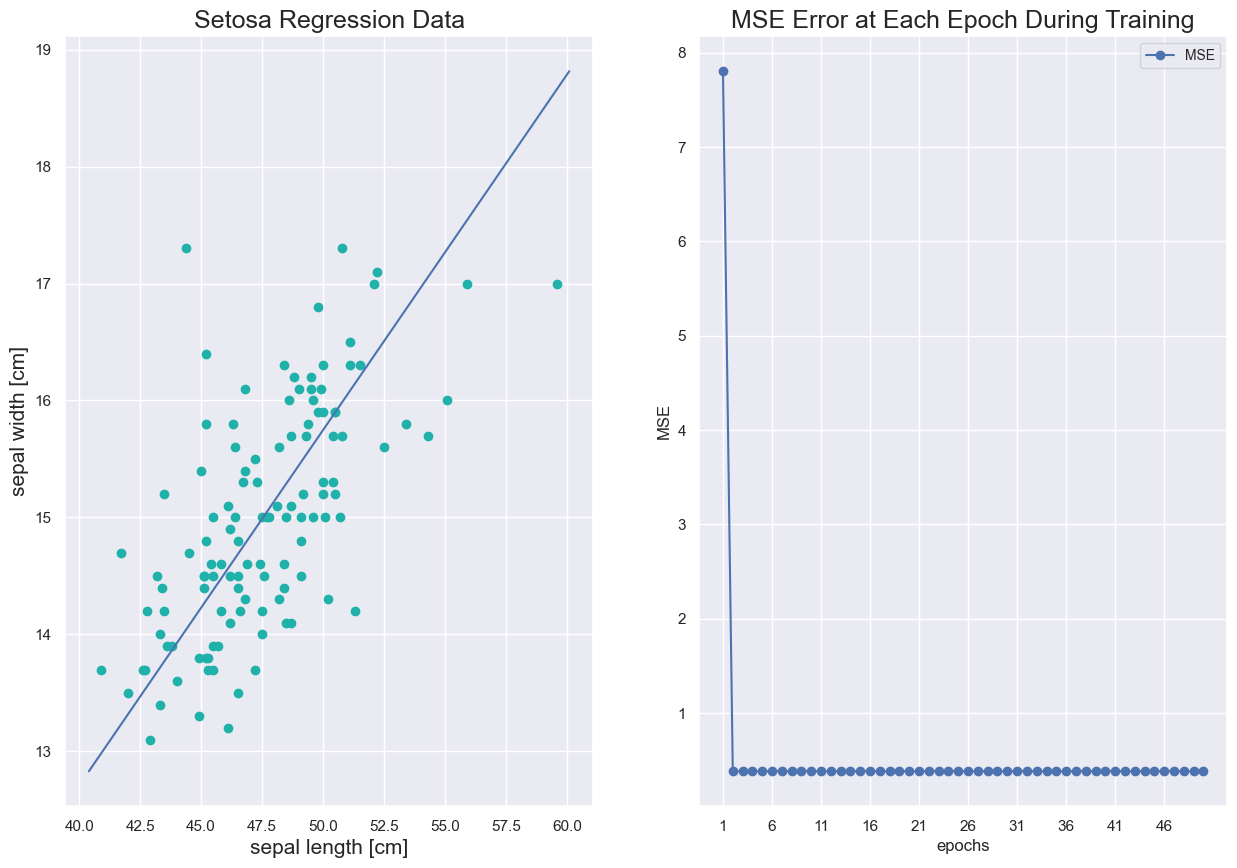

In [ ]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("sepal length [cm]", fontsize = 15)
ax1.set_ylabel("sepal width [cm]", fontsize = 15)
ax1.set_title("Setosa Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)


C:\Users\faith\AppData\Local\Temp\ipykernel_31280\654729082.py:45: RuntimeWarning: overflow encountered in scalar power
  errors += .5*(error**2)
C:\Users\faith\AppData\Local\Temp\ipykernel_31280\654729082.py:43: RuntimeWarning: invalid value encountered in subtract
  self.w_[:-1] -= alpha*error*xi
C:\Users\faith\AppData\Local\Temp\ipykernel_31280\654729082.py:44: RuntimeWarning: invalid value encountered in scalar subtract
  self.w_[-1] -= alpha*error
C:\Users\faith\AppData\Local\Temp\ipykernel_31280\654729082.py:43: RuntimeWarning: overflow encountered in multiply
  self.w_[:-1] -= alpha*error*xi


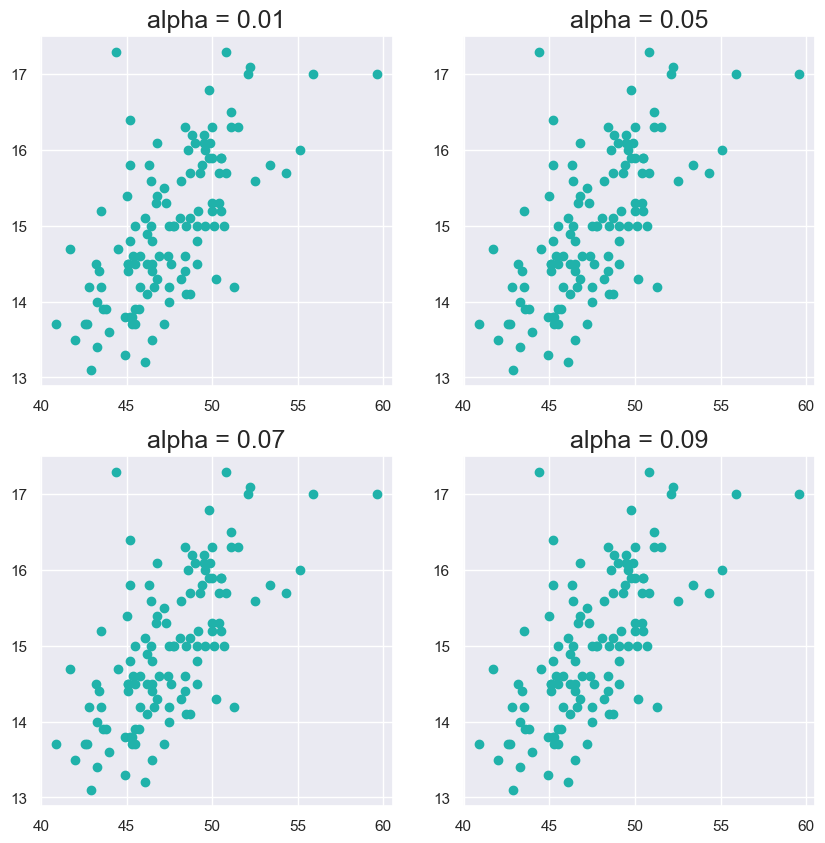

In [ ]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)